In [34]:
import pandas as pd
import numpy as np

import datetime
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
df = pd.read_csv("df.csv")
#df["timestamp"] = pd.to_datetime(df["timestamp"])

In [122]:
#weather = pd.read_csv("cleaned_weather.csv")

In [123]:
df = df.drop(columns="Unnamed: 0")

In [124]:
df = df.set_index("timestamp")

In [125]:
set(df["stations"])

{3, 8, 24, 25, 26, 33, 34, 35, 39, 47, 55}

In [126]:
print(df.shape)

(19204, 14)


In [127]:
df.head()


,n_req,stations,StationName,MeanTemp,MinTemp,MaxTemp,DewPoint,Percipitation,WindSpeed,MaxSustainedWind,Gust,Rain,SnowDepth,SnowIce
timestamp,,,,,,,,,,,,,,
2010-01-01,112,3,BERGEN POINT,35.6,33.3,41.2,40.134385,0.00,2.5,7.0,12.719676,0,0.0,0
2010-01-01,167,24,JOHN F KENNEDY INTERNATIONAL AIRPORT,35.1,30.2,41.0,31.600000,0.29,2.4,8.0,13.867447,1,0.0,1
2010-01-01,85,25,KINGS POINT,34.5,32.2,37.9,40.134385,0.00,1.4,2.9,7.840482,0,0.0,0
2010-01-01,983,26,LA GUARDIA AIRPORT,35.1,30.2,39.0,31.500000,0.23,2.8,8.0,13.913363,1,1.2,1
2010-01-01,303,39,NYC CENTRAL PARK,35.9,33.1,39.9,32.000000,0.25,2.3,6.0,11.537468,1,0.0,1


In [53]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(df)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=True)

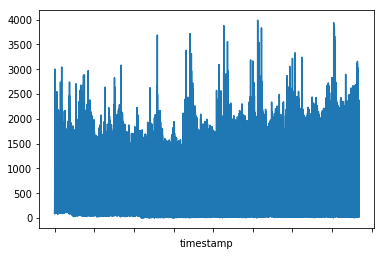

In [41]:
#ts_obj = df.loc[:,["timestamp", "n_req"]]
ts_obj = df["n_req"]
ts_obj.plot(x = "timestamp", y = "n_req")

In [42]:
from fbprophet import Prophet

In [43]:
train_ts = ts_obj.loc["2010-01-01":"2018-10-31"]
test_ts = ts_obj.loc["2018-11-01":"2018-11-12"]

In [71]:
train_ts = train_ts.groupby("timestamp").sum()
test_ts = test_ts.groupby("timestamp").sum()

In [72]:
train_fb = pd.DataFrame(train_ts)
train_fb['ds'] = train_ts.index
train_fb.columns = ["y", "ds"]

In [73]:
m = Prophet()
m.fit(train_fb)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
future = m.make_future_dataframe(periods=12)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3233,2018-11-08,5465.654341,4706.485772,6285.542074
3234,2018-11-09,5312.943766,4569.864097,6097.817769
3235,2018-11-10,4594.137278,3866.379083,5337.192439
3236,2018-11-11,4443.264771,3699.567983,5186.681359
3237,2018-11-12,5532.242482,4816.096682,6302.236697


In [87]:
from sklearn.metrics import mean_squared_error

def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

mape(y_true = test_ts.values, y_pred = forecast["yhat"][-12:].values)

0.20475921974397124

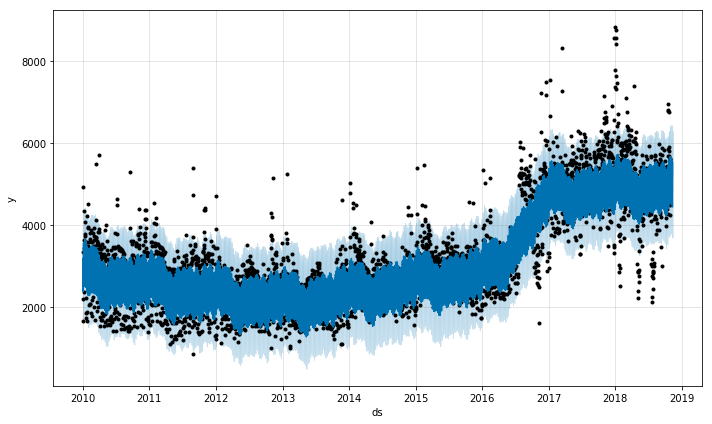

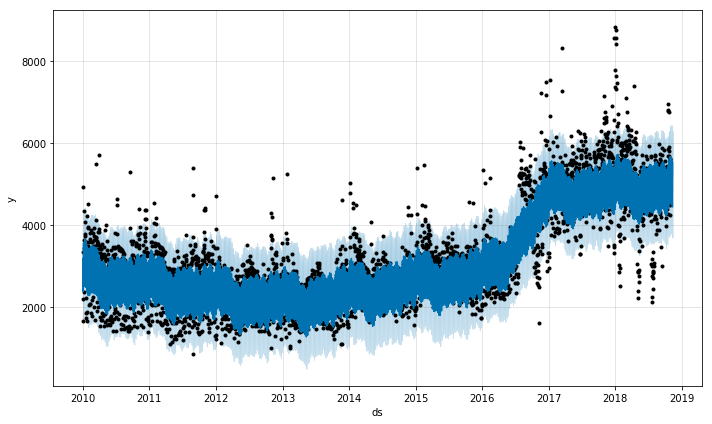

In [76]:
m.plot(forecast)

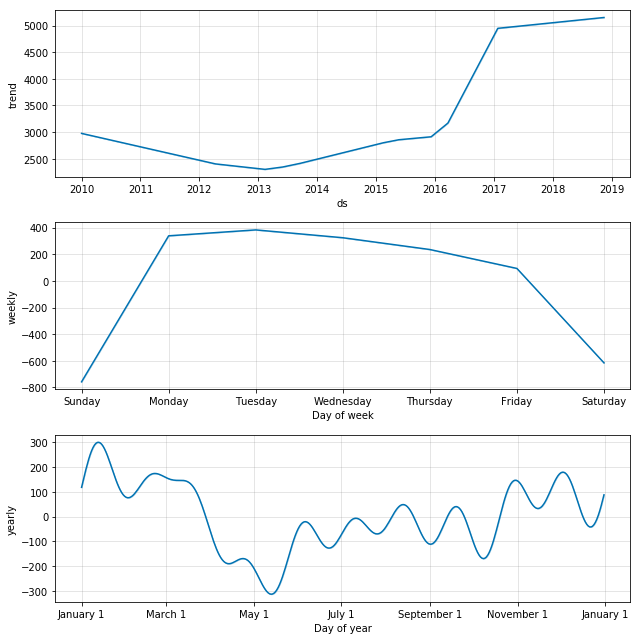

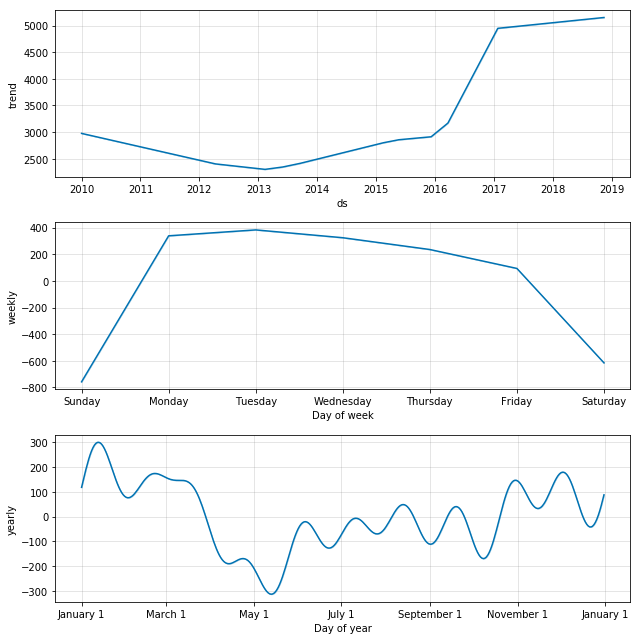

In [77]:
m.plot_components(forecast)

In [152]:
df = pd.get_dummies(df)

In [153]:
df.head()

,n_req,stations,MeanTemp,MinTemp,MaxTemp,DewPoint,Percipitation,WindSpeed,MaxSustainedWind,Gust,...,StationName_CENTRAL PARK,StationName_JOHN F KENNEDY INTERNATIONAL AIRPORT,StationName_KINGS POINT,StationName_LA GUARDIA AIRPORT,StationName_MUNI ARPT TARANTINE FLD AP,StationName_NEW YORK CENTRAL PARK,StationName_NEW YORK CITY CENTRAL PARK,StationName_NYC CENTRAL PARK,StationName_PORT AUTH DOWNTN MANHATTAN WALL ST HEL,StationName_THE BATTERY
timestamp,,,,,,,,,,,,,,,,,,,,,
2010-01-01,112,3,35.6,33.3,41.2,40.134385,0.00,2.5,7.0,12.719676,...,0,0,0,0,0,0,0,0,0,0
2010-01-01,167,24,35.1,30.2,41.0,31.600000,0.29,2.4,8.0,13.867447,...,0,1,0,0,0,0,0,0,0,0
2010-01-01,85,25,34.5,32.2,37.9,40.134385,0.00,1.4,2.9,7.840482,...,0,0,1,0,0,0,0,0,0,0
2010-01-01,983,26,35.1,30.2,39.0,31.500000,0.23,2.8,8.0,13.913363,...,0,0,0,1,0,0,0,0,0,0
2010-01-01,303,39,35.9,33.1,39.9,32.000000,0.25,2.3,6.0,11.537468,...,0,0,0,0,0,0,0,1,0,0


In [102]:
df_target = df.loc["2010-01-02":,"n_req"]
df_target.head()

timestamp
2010-01-02     131
2010-01-02    1365
2010-01-02     361
2010-01-02     209
2010-01-02     134
Name: n_req, dtype: int64

In [150]:
df_target = df["n_req"]

In [154]:
df_feature = df.iloc[:, 2:]

In [157]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df_feature, df_target, test_size = 0.25, random_state = 42)

In [156]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [180]:
predictions = rf.predict(test_features)

In [185]:
mape(y_true = test_labels.values, y_pred = predictions)

0.29576829498193097

In [182]:
feature_list = list(train_features.columns)

In [183]:
importances = list(rf.feature_importances_)

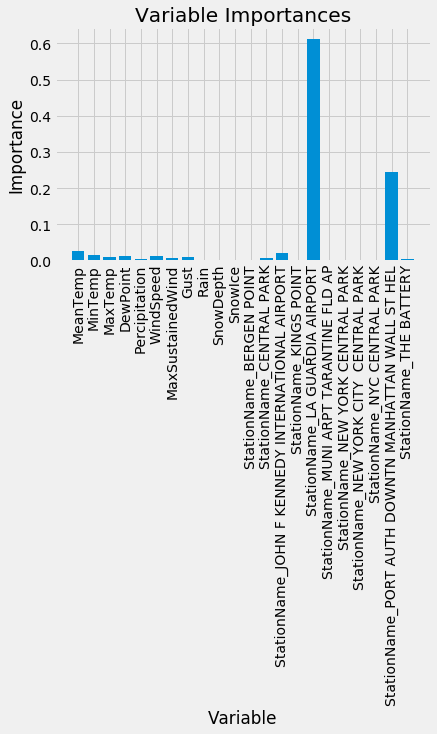

In [186]:
plt.style.use('fivethirtyeight')

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


In [173]:
from sklearn.linear_model import LinearRegression

In [175]:
lr = LinearRegression()
lr.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [176]:
lr_predictions = lr.predict(test_features)
mape(y_true = test_labels.values, y_pred = lr_predictions)

0.3963566231540362

In [177]:
lr.coef_

array([-1.98417919e+00,  8.43428266e-01,  1.08257948e+00, -8.84184530e-01,
        1.72253210e+00, -1.46186774e+00,  1.22329471e+00,  2.96858628e+00,
       -1.59763418e+01,  5.06863992e+00,  1.26307054e+01, -2.39314851e+02,
       -4.69226429e+02, -7.01845013e+01, -2.65550095e+02,  1.18974013e+03,
       -4.55058537e+02, -3.52130046e+02, -2.12781418e+02, -9.47509450e+01,
        1.38269184e+03, -4.13435141e+02])

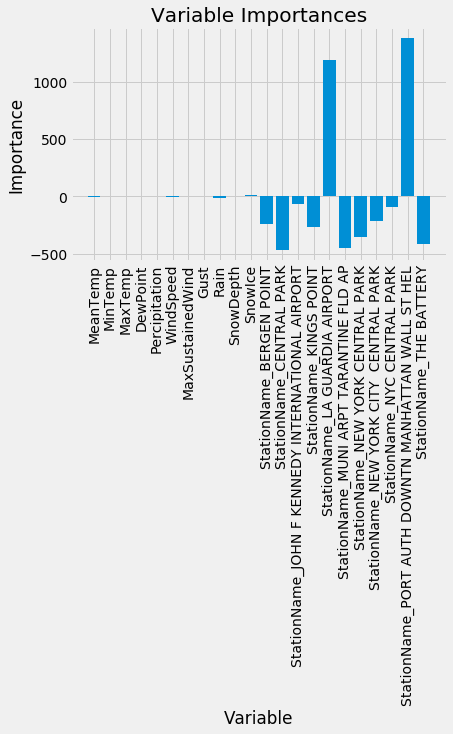

In [178]:
plt.style.use('fivethirtyeight')

x_values = list(range(len(lr.coef_)))
plt.bar(x_values, lr.coef_, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


In [206]:
from pyglmnet import GLM
glm = GLM(distr='poisson', alpha=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train_features.values)
glm.fit(scaler.transform(train_features.values), train_labels)

poi_prediction = glm.predict(scaler.transform(test_features.values))
mape(y_true = test_labels.values, y_pred = poi_prediction)

0.6539891024946665

In [207]:
glm.reg_lambda

array([0.5       , 0.3237394 , 0.2096144 , 0.13572088, 0.08787639,
       0.0568981 , 0.03684031, 0.02385332, 0.01544452, 0.01      ])

In [216]:
import statsmodels.api as sm

In [218]:
poi_summary = sm.GLM(train_labels, train_features, family=sm.families.Poisson()).fit()

In [223]:
print(poi_summary.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  n_req   No. Observations:                14403
Model:                            GLM   Df Residuals:                    14381
Model Family:                 Poisson   Df Model:                           21
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.5974e+05
Date:                Tue, 06 Aug 2019   Deviance:                   6.1263e+05
Time:                        02:19:56   Pearson chi2:                 6.18e+05
No. Iterations:                     9   Covariance Type:             nonrobust
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
MeanTemp                                           

In [228]:
poi_predictions = poi_summary.predict(test_features)
mape(y_true = test_labels.values, y_pred = poi_predictions)

0.3011187375586165